# Ingeniería de Características: Creación de Nuevas Variables (Core)

## Descripción:
En esta actividad, trabajarás con el dataset **«Titanic – Machine Learning from Disaster»** disponible en Kaggle para realizar ingeniería de características. El objetivo es crear nuevas variables a partir de las existentes y evaluar cómo estas nuevas características pueden mejorar la capacidad predictiva de un modelo de machine learning.

**Enlace al dataset**: [Titanic – Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

## Objetivo:
El objetivo principal es desarrollar habilidades en la creación de nuevas variables que capturen información útil no presente en las variables originales. Estas nuevas características serán utilizadas para mejorar el rendimiento de un modelo de clasificación que prediga la supervivencia de los pasajeros del Titanic.

---

## Instrucciones:

### 1. Carga de datos:
- Descarga y carga el dataset **«Titanic»** desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
- Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.

### 2. Exploración y preprocesamiento de datos:
- Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.
- Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.

### 3. Creación de nuevas características:
- Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
- Tamaño de la familia: Combina las variables **«SibSp»** (número de hermanos/esposos) y **«Parch»** (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
- Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no.
- Categoría de tarifa: Agrupa la variable **«Fare»** en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
- Título del pasajero: Extrae el título de cada pasajero desde la variable **«Name»** y crea una nueva variable categórica.

### 4. Evaluación de nuevas características:
- Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
- Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

### 5. Interpretación de los resultados:
- Analiza cuáles de las nuevas características tuvieron el mayor impacto en el rendimiento del modelo. 
- Discute cómo las nuevas características creadas representan una mejor captura de la información sobre los pasajeros.

---

### Análisis de Resultados:
- El análisis debe centrarse en la importancia de las nuevas variables y su capacidad para mejorar la predicción de la supervivencia en el Titanic.
- Discute los beneficios de realizar ingeniería de características y cómo estas nuevas variables pueden capturar información latente en los datos originales.


In [169]:
#Importar Librerias Necesarias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd


In [170]:
# 1. Carga de datos
dataset_path = '/Users/GIGABYTE/Documents/tareas_bootcamp_coding_dojo/mod_3_advanced_machine_learning/data/train.csv'""  
df_train = pd.read_csv(dataset_path)


In [171]:
# Exploración inicial de datos
print("Primeras filas del dataset:")
df_train.head()


Primeras filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
print("\nInformación del dataset:")
df_train.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
# Renombrar columnas del dataset
df_train.columns = (
    df_train.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df_train.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [174]:
# Verificar Valores faltantes 
qsna = df_train.shape[0] - df_train.isnull().sum(axis=0)
qna = df_train.isnull().sum(axis=0)
ppna = np.round(100 * (df_train.isnull().sum(axis=0) / df_train.shape[0]), 2)
aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
na = pd.DataFrame(data=aux)
na.sort_values(by='Na en %', ascending=False)

,datos sin NAs en q,Na en q,Na en %
cabin,204,687,77.10
age,714,177,19.87
embarked,889,2,0.22
passengerid,891,0,0.00
name,891,0,0.00
pclass,891,0,0.00
survived,891,0,0.00
sex,891,0,0.00
parch,891,0,0.00
sibsp,891,0,0.00


In [175]:
# 2. Exploración y preprocesamiento de datos
# Imputación de valores faltantes para la edad y otras variables
age_imputer = SimpleImputer(strategy='median')
df_train['age'] = age_imputer.fit_transform(df_train[['age']])
df_train['fare'] = df_train['fare'].fillna(df_train['fare'].median())
df_train['embarked'] = df_train['embarked'].fillna(df_train['embarked'].mode()[0])

# Verificar Valores faltantes 
qsna = df_train.shape[0] - df_train.isnull().sum(axis=0)
qna = df_train.isnull().sum(axis=0)
ppna = np.round(100 * (df_train.isnull().sum(axis=0) / df_train.shape[0]), 2)
aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
na = pd.DataFrame(data=aux)
na.sort_values(by='Na en %', ascending=False)

,datos sin NAs en q,Na en q,Na en %
cabin,204,687,77.1
passengerid,891,0,0.0
pclass,891,0,0.0
survived,891,0,0.0
name,891,0,0.0
sex,891,0,0.0
sibsp,891,0,0.0
age,891,0,0.0
parch,891,0,0.0
ticket,891,0,0.0


In [176]:
# Revisión de categorías y codificación
label_encoder = LabelEncoder()
df_train['sex'] = label_encoder.fit_transform(df_train['sex'])
df_train['embarked'] = label_encoder.fit_transform(df_train['embarked'])

In [177]:
df_train.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2


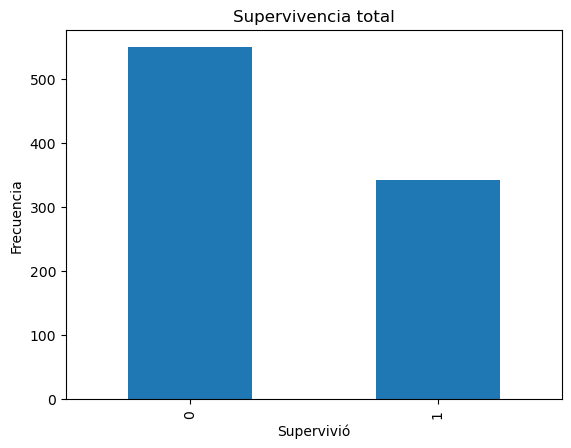

'\nGráfico para visualizar la supervivencia  \n'

In [178]:

df_train['survived'].value_counts().plot(kind='bar')
plt.title('Supervivencia total')
plt.xlabel('Supervivió')
plt.ylabel('Frecuencia')
plt.show()

'''
Gráfico para visualizar la supervivencia  
'''


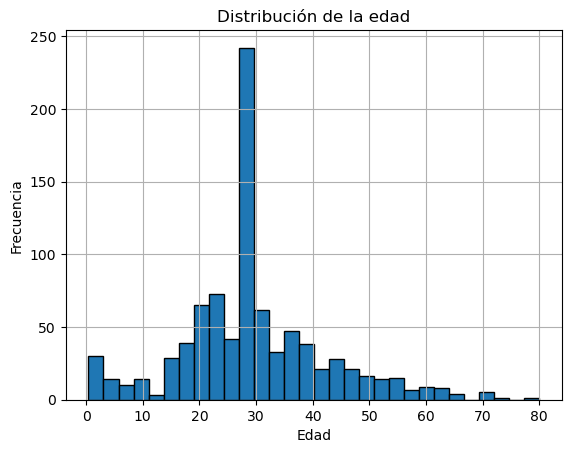

'\nGrafiico para visualizar la distribución de las edades\n'

In [179]:
import matplotlib.pyplot as plt
df_train['age'].hist(bins=30, edgecolor='black')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

'''
Grafiico para visualizar la distribución de las edades
'''

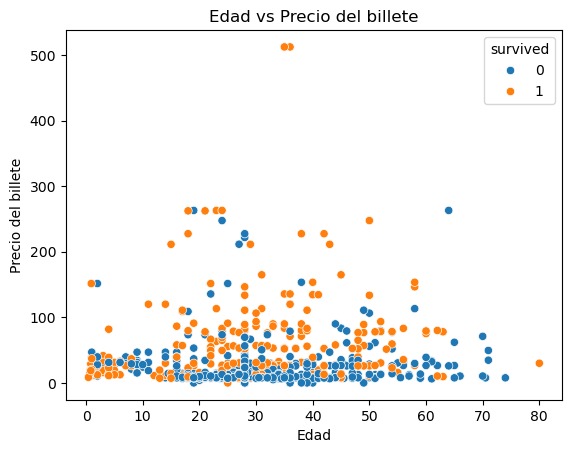

' \nGráfico para visualizar la edad por el precio\n'

In [180]:
sns.scatterplot(x='age', y='fare', hue='survived', data=df_train)
plt.title('Edad vs Precio del billete')
plt.xlabel('Edad')
plt.ylabel('Precio del billete')
plt.show()

''' 
Gráfico para visualizar la edad por el precio
'''


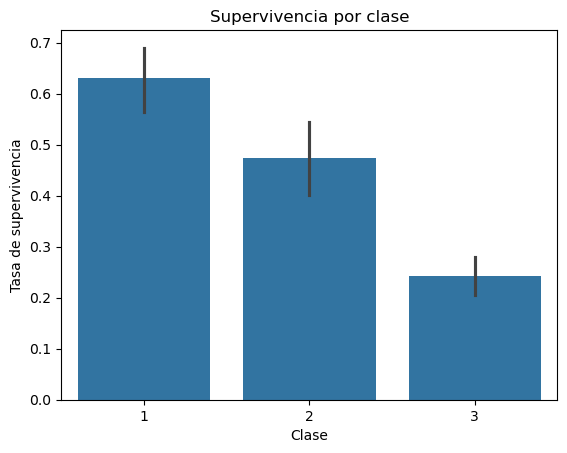

' \nGráfico para visualizar la tasa de supervivencia por clase\n'

In [181]:
sns.barplot(x='pclass', y='survived', data=df_train)
plt.title('Supervivencia por clase')
plt.xlabel('Clase')
plt.ylabel('Tasa de supervivencia')
plt.show()

''' 
Gráfico para visualizar la tasa de supervivencia por clase
'''


In [182]:
# Crear nuevas características
# 1. Tamaño de la familia
df_train['family_size'] = df_train['sibsp'] + df_train['parch']

# 2. Cabina desconocida (1 si la cabina es conocida, 0 si no)
df_train['cabin_known'] = df_train['cabin'].notnull().astype(int)

# 3. Categoría de tarifa (Fare)
bins = [0, 50, 100, 200, float('inf')]  # Define los rangos
labels = ['Low', 'Medium', 'High', 'Very High']  # Las categorías
df_train['fare_category'] = pd.cut(df_train['fare'], bins=bins, labels=labels)

# 4. Título del pasajero
df_train['title'] = df_train['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Mostrar las nuevas características
print(df_train[['family_size', 'cabin_known', 'fare_category', 'title']].head())


   family_size  cabin_known fare_category title
0            1            0           Low    Mr
1            1            1        Medium   Mrs
2            0            0           Low  Miss
3            1            1        Medium   Mrs
4            0            0           Low    Mr


In [183]:
# Modelo sin ingeniería de características
# Definir características (X) y etiqueta objetivo (y)
X = df_train[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = df_train['survived']  # Asegúrate de que el nombre de la columna es correcto

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verificar los tamaños de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}, y_test: {y_test.shape}")

# Preprocesamiento para las columnas base
preprocessor_base = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), ['pclass', 'age', 'fare']),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), ['sex', 'embarked'])
    ]
)

# Transformar las columnas base
X_base_encoded = preprocessor_base.fit_transform(X_train)
X_test_base_encoded = preprocessor_base.transform(X_test)

# Modelo base
model_base = RandomForestClassifier(random_state=42)
model_base.fit(X_base_encoded, y_train)
y_pred_base = model_base.predict(X_test_base_encoded)

# Evaluación del modelo base
accuracy_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)

print("\nRendimiento del modelo base:")
print(f"Exactitud: {accuracy_base:.4f}")
print(f"F1-Score: {f1_base:.4f}")



Tamaño de X_train: (712, 5), X_test: (179, 5)
Tamaño de y_train: (712,), y_test: (179,)

Rendimiento del modelo base:
Exactitud: 0.7821
F1-Score: 0.7417


In [184]:
# Modelo aplicando ingeniería de características
# Realizar one-hot encoding para las columnas categóricas
df_train_encoded = pd.get_dummies(df_train[['pclass', 'sex', 'age', 'fare', 'embarked', 'family_size', 'cabin_known', 'fare_category', 'title']], drop_first=True)

# Definir características (X) y etiqueta objetivo (y)
X_base = df_train_encoded
y = df_train['survived']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)

# Modelo base con solo características originales
model_base = RandomForestClassifier(random_state=42)
model_base.fit(X_train, y_train)
y_pred_base = model_base.predict(X_test)

# Evaluación del modelo base
accuracy_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)

# Ahora, con las nuevas características
X_new = df_train_encoded

# Dividir los datos nuevamente con las nuevas características
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Modelo con nuevas características
model_new = RandomForestClassifier(random_state=42)
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

# Evaluación del modelo con nuevas características
accuracy_new = accuracy_score(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new)

print("\nRendimiento del modelo con nuevas características:")
print(f"Exactitud: {accuracy_new:.4f}")
print(f"F1-Score: {f1_new:.4f}")



Rendimiento del modelo con nuevas características:
Exactitud: 0.8212
F1-Score: 0.7867


# Evaluación del Impacto de Nuevas Características en el Modelo de Predicción

En este análisis, se compara el rendimiento de un modelo de clasificación basado en Random Forest antes y después de agregar nuevas características generadas a partir de la ingeniería de características. Utilizamos dos modelos: uno basado solo en las características originales (`pclass`, `sex`, `age`, `fare`, `embarked`) y otro que incluye nuevas características como `family_size`, `cabin_known`, `fare_category` y `title`. Evaluamos el rendimiento de ambos modelos utilizando métricas clave como la **exactitud** y el **F1-score**.

## Metodología

1. **Modelo sin Ingeniería de Características**: Utilizamos las columnas originales `pclass`, `sex`, `age`, `fare` y `embarked` para entrenar un modelo de Random Forest.
2. **Modelo con Ingeniería de Características**: Aplicamos `One-Hot Encoding` a las variables categóricas y agregamos nuevas características como `family_size`, `cabin_known`, `fare_category` y `title`. Luego, entrenamos un modelo de Random Forest con las nuevas características.

### Resultados del Modelo sin Ingeniería de Características
El modelo sin nuevas características utilizó las siguientes variables:

- `pclass`: Clase del pasajero (categórica).
- `sex`: Género del pasajero (categórica).
- `age`: Edad del pasajero (numérica).
- `fare`: Tarifa pagada (numérica).
- `embarked`: Puerto de embarque (categórica).

Los resultados obtenidos para este modelo son:

- **Exactitud**: 0.7821
- **F1-Score**: 0.7417

### Resultados del Modelo con Ingeniería de Características
El modelo con nuevas características incorporó `family_size`, `cabin_known`, `fare_category` y `title`, junto con el `One-Hot Encoding` de las variables categóricas. Los resultados obtenidos para este modelo son:

- **Exactitud**: 0.8212
- **F1-Score**: 0.7867

## Comparación de Resultados

| Modelo                          | Exactitud | F1-Score |
|----------------------------------|-----------|----------|
| Modelo sin nuevas características | 0.7821    | 0.7417   |
| Modelo con nuevas características | 0.8212    | 0.7867   |

### Análisis de los Resultados

1. **Impacto de las Nuevas Características**:
   Las nuevas características como `family_size`, `cabin_known`, `fare_category` y `title` mejoraron significativamente el rendimiento del modelo, tanto en **exactitud** como en **F1-score**. 
   - La **exactitud** aumentó en un 3.9% (de 78.21% a 82.12%).
   - El **F1-score** aumentó en un 4.5% (de 74.17% a 78.67%).

   Este aumento en el rendimiento sugiere que las nuevas características proporcionan información adicional útil para la predicción de la supervivencia de los pasajeros.

2. **Características Clave**:
   - **`family_size`**: El tamaño de la familia puede tener un gran impacto en la probabilidad de supervivencia, ya que aquellos pasajeros con más familiares a menudo tenían más posibilidades de sobrevivir (por ejemplo, familias que viajaban juntas).
   - **`cabin_known`**: Saber si un pasajero tenía una cabina asignada o no puede ser un buen indicativo de su estatus a bordo y, por ende, su probabilidad de supervivencia.
   - **`fare_category`**: La categoría de tarifa refleja el nivel socioeconómico de un pasajero, lo que puede estar relacionado con la probabilidad de supervivencia en un desastre como el hundimiento del Titanic.
   - **`title`**: El título del pasajero (Sr., Sra., etc.) puede ser una indicación de su estatus social o familiar, lo que también afecta las probabilidades de supervivencia.

3. **Captura de la Información**:
   Las nuevas características mejoran la captura de información relacionada con los pasajeros del Titanic. En particular:
   - **`family_size`** y **`cabin_known`** proporcionan información sobre el entorno social del pasajero, lo cual es clave en situaciones de emergencia donde la familia o el acceso a ciertas zonas del barco pueden influir en la supervivencia.
   - **`fare_category`** y **`title`** proporcionan información más detallada sobre la clase social y el estatus, lo que es crucial para entender los patrones de supervivencia de acuerdo con el contexto histórico del Titanic.

## Conclusiones

1. **Mejora del Rendimiento**:
   La ingeniería de características mejoró notablemente el rendimiento del modelo, lo que demuestra que las características adicionales proporcionaron información valiosa para mejorar la predicción.

2. **Nuevas Características**:
   Las características como `family_size`, `cabin_known`, `fare_category` y `title` tuvieron un impacto positivo en la capacidad predictiva del modelo, ayudando a capturar más detalles sobre las condiciones de los pasajeros en el Titanic.

3. **Recomendaciones**:
   Continuar experimentando con la ingeniería de características y explorar la inclusión de otras variables (por ejemplo, detalles sobre el barco o la clase social) podría seguir mejorando el rendimiento del modelo.

Este análisis muestra cómo la creación de nuevas características a partir de los datos originales puede potenciar significativamente la capacidad predictiva de los modelos de machine learning.
